The travelling salesman problem is a type of path-optimization problem. In this problem, we have a traveller and a list of cities that he wants to travel. The problem now is finding the best route such that the traveller only visits each city one and the total travel distance is optimized. 

In [ ]:
using DataFrames
using BenchmarkTools
using Plots
using Animations

So to start, we need a function that measures the distance between two cities. Below, I created a function named `measure_distance` to compute the total distance needed to travese ``N`` cities which takes a 2D array as an input. As we can see, instead of using `for` loops, I used `circshift` which is similar to the `np.roll` in Python to simply roll my array and easily compute the distance of all the cities at once. This process both saves computational time and code space since it only has a few lines compared to using `for` loops

In [2]:
function measure_distance(cities)
    city1, city2 = cities, [circshift(cities[i],(-1)) for i in 1:length(cities)]
    x1, y1 = city1[1], city1[2]
    x2, y2 = city2[1], city2[2]
    distance = sqrt.(((x2-x1).^2)+((y2-y1).^2))
    return sum(distance)
end 

measure_distance (generic function with 1 method)

In [3]:
function find_new_route(cities,N)
    new_cities = deepcopy(cities)
    new_cities2 = deepcopy(cities)
    p = rand(1:N)
    l = rand(1:N÷2)
    if p+l <= N
        new_cities[1][p+1:p+l] = cities[1][p+1:p+l][end:-1:1]
        new_cities[2][p+1:p+l] = cities[2][p+1:p+l][end:-1:1]
        return new_cities
    else
        new_cities2[1][p+1:end] = cities[1][p+1:end][end:-1:1]
        new_cities2[2][p+1:end] = cities[2][p+1:end][end:-1:1]
        return new_cities2
    end
end

find_new_route (generic function with 1 method)

In [4]:
function threshold_algorithm(cities)
    newcities = find_new_route(cities,N)
    if measure_distance(newcities) <= measure_distance(cities)
        cities = deepcopy(newcities)
    end
    return cities
end

threshold_algorithm (generic function with 1 method)

In [5]:
function boltzmann_algorithm(cities,T)
    newcities2 = find_new_route(cities,N)
    if T > (measure_distance(newcities2) - measure_distance(cities))
        cities = deepcopy(newcities2)
    end
    return cities
end

boltzmann_algorithm (generic function with 1 method)

In [25]:
L = 1
N = 150

x = rand(N)
y = rand(N)

cities = [x,y]

global cities1 = deepcopy(cities)
global cities2 = deepcopy(cities)

global T = L/8 #initial temperature

Temp = Vector{Float64}()
normalized_length1 = Vector{Float64}()
normalized_length2 = Vector{Float64}()


iteration = 100_000

anim1 = Plots.Animation()
anim2 = Plots.Animation()
for i in 1:iteration
    #println(i, " ", T)
    #println(cities1)
    push!(Temp, T)

    l1 = measure_distance(cities1)/(L*sqrt(N))
    l2 = measure_distance(cities2)/(L*sqrt(N))

    push!(normalized_length1, l1)
    push!(normalized_length2, l2)

    global cities1 = threshold_algorithm(cities1)
    global cities2 = boltzmann_algorithm(cities2, T)

    if i%100==0
        x=rand(0:1)
        if x==0 global T=T-(0.1*T) end
        if x==1 global T=T+(0.1*T) end
    end

    if i%500==0
        plt = plot([1:i], normalized_length1, seriestype = :line, label = "threshold algorithm")
        plot!([1:i], normalized_length2, seriestype = :line, label = "boltzmann algorithm")
        xlabel!("iteration")
        ylabel!("normalized length")
        frame(anim1,plt)

        plt2 = plot(cities[1], cities[2], seriestype=:scatter, label = "cities")
        plot!(cities1[1], cities1[2], label = "threshold algorithm")
        plot!(cities2[1], cities2[2], label = "boltzmann algorithm")
        plot!(size=(600,600))
        frame(anim2,plt2)
    end
end

┌ Info: Saved animation to 
│   fn = /Users/kleo/Documents/Github2/Physics-215-Julia/Mini Project - Travelling Salesman/annealing_schedule.gif
└ @ Plots /Users/kleo/.julia/packages/Plots/1WwM3/src/animation.jl:114


Plots.AnimatedGif("/Users/kleo/Documents/Github2/Physics-215-Julia/Mini Project - Travelling Salesman/annealing_schedule.gif")
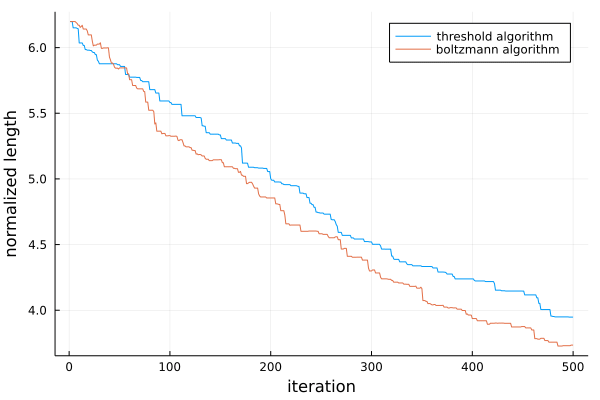

In [26]:
gif(anim1, "annealing_schedule.gif", fps = 10)

┌ Info: Saved animation to 
│   fn = /Users/kleo/Documents/Github2/Physics-215-Julia/Mini Project - Travelling Salesman/path_visualization.gif
└ @ Plots /Users/kleo/.julia/packages/Plots/1WwM3/src/animation.jl:114


Plots.AnimatedGif("/Users/kleo/Documents/Github2/Physics-215-Julia/Mini Project - Travelling Salesman/path_visualization.gif")
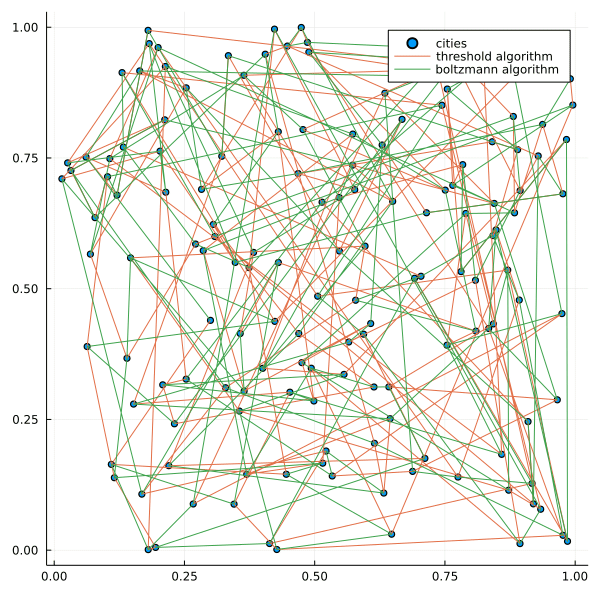

In [27]:
gif(anim2, "path_visualization.gif", fps = 10)

In [166]:
plot([1:iteration], normalized_length1, seriestype = :line, label = "threshold algorithm")
plot!([1:iteration], normalized_length2, seriestype = :line, label = "boltzmann algorithm")
xlabel!("iteration")
ylabel!("normalized length")

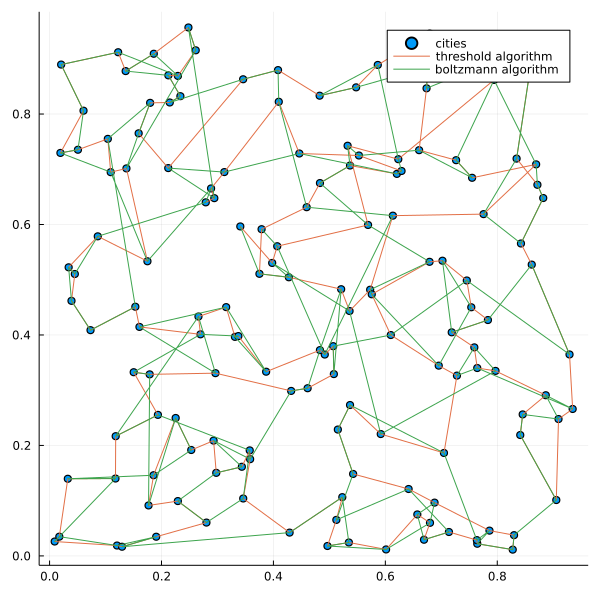

In [24]:
plot(cities[1], cities[2], seriestype=:scatter, label = "cities")
plot!(cities1[1], cities1[2], label = "threshold algorithm")
plot!(cities2[1], cities2[2], label = "boltzmann algorithm")
plot!(size=(600,600))

In [31]:
println("normalized length (threshold algorithm) = ", normalized_length1[end])
println("normalized length (boltzmann algorithm) = ", normalized_length2[end])

normalized length (threshold algorithm) = 0.8526456287030246
normalized length (boltzmann algorithm) = 0.8332571660473695
